# Machine Learning: HW1 Question 2a and 2b
## 2a: k-means algorithm

In [1]:
#Importing necessary modules/libraries
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
## STEP 1: Convert text file to vectors
with open('toydata.txt', 'r') as file:
    #lines = [line.rstrip() for line in file]
    lines = [line.strip() for line in file]

vectors = []

for i in range(len(lines)):
    for j in range(len(lines[i])):
        if lines[i][j] == ' ':
            coord1 = float(lines[i][:j])
            coord2 = float(lines[i][j:])
            vectors.append(np.array([coord1, coord2]))
            break
#vectors

Now, we'll look at the plot of the data before clustering:

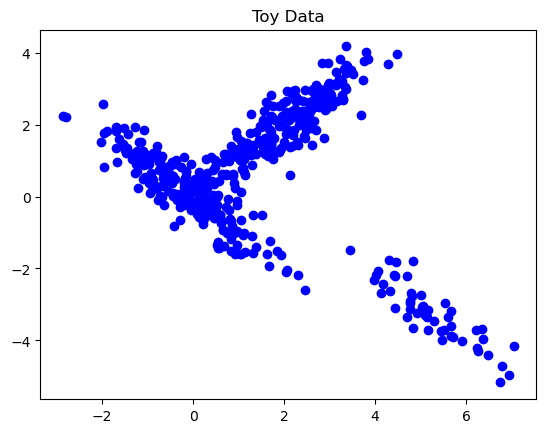

In [3]:
for i in range(len(vectors)):
    plt.scatter(vectors[i][0], vectors[i][1], color='b')
plt.title('Toy Data')
plt.show()

As we can see above, there are three distinct clusters that we'll use k-means and k-means++ to isolate.

In [4]:
## STEP 2: Auxiliary Functions
def get_gamma(m, x):
    """
    Returns the gamma vector based on centroid vector m and all points x
    Each gamma takes a value 0, 1, or 2
    """
    N = len(x)
    gamma = np.zeros((N), dtype=int)
    for i in range(N):
        distances = []
        min_dist_k = 0
        distances.append(np.linalg.norm(x[i] - m[0]))
        distances.append(np.linalg.norm(x[i] - m[1]))
        if distances[1] - distances[0] < 0:
            min_dist_k = 1
        distances.append(np.linalg.norm(x[i] - m[2]))
        if distances[2] - distances[1] < 0 and distances[2] - distances[0] < 0:
            min_dist_k = 2
        gamma[i] = min_dist_k

    return gamma

def get_C(x, gamma):
    """
    C is a list of lists where the outer index refers to which cluster and each list returns x in that cluster
    """
    N = len(gamma)
    C = []
    C_0 = []
    C_1 = []
    C_2 = []
    C.append(C_0)
    C.append(C_1)
    C.append(C_2)

    for i in range(N):
        a = gamma[i]
        C[a].append((x[i][0], x[i][1]))

    return C

def get_J(x, m, C, k):
    total = 0.0
    for i in range(k):
        cur_sum = 0.0
        for j in range(len(C[i])):
            diff = (C[i][j][0] - m[i][0], C[i][j][1] - m[i][1])
            sq_norm = np.linalg.norm(diff)**2
            cur_sum = cur_sum + sq_norm
        total = total + cur_sum
    return total        
        




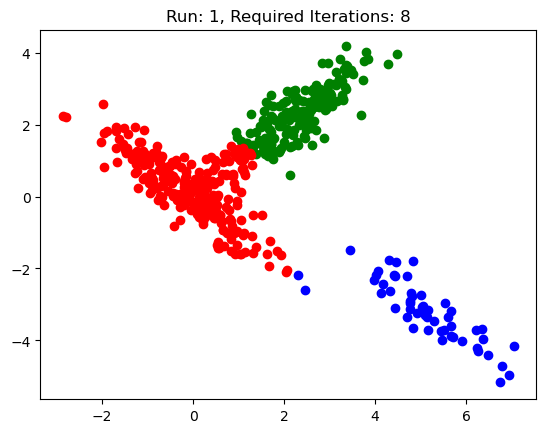

<Figure size 1000x1000 with 0 Axes>

In [5]:
# STEP 3: Initialization of k-means
x = vectors
N = len(x)

#This will be turned off after the first plot so that we don't see 20 plots
plotbool = True

J = [] # J has length 20, and each element is a list of distortion values that have length determined by convergence
T = [] # Similarly, T has length 20 and each element is an integer indicating the number of iterations required for convergence
for q in range(20):
    cur_J = []
    k = 3
    #m is initially k random samples of our data
    m = random.sample(x, k)
    t = 1 #t will track how many iterations till convergence
    while True:
        #Generate gamma and C
        gamma = get_gamma(m, x)
        C = get_C(x, gamma)
        cur_J.append(get_J(x, m, C, k))

        #Update centroid locations/use a temp variable to check if our centroids will change,
        #if not, then we stop iterating
        temp = m[:]
        for i in range(k):
            sum_x = 0.0
            sum_y = 0.0
            for j in range(len(C[i])):
                sum_x = sum_x + C[i][j][0]
                sum_y = sum_y + C[i][j][1]
            m[i] = (sum_x/len(C[i]), sum_y/len(C[i]))

        
        diff = 0.0
        for i in range(k):
            diff = diff + np.linalg.norm(temp[i][0] - m[i][0]) + np.linalg.norm(temp[i][1] - m[i][1])
        if diff < 1e-6:
            #Plot corresponding points
            if plotbool:
                for i in range(k):
                    cur_points = C[i]
                    colors = ['b', 'g', 'r']
                    for j in range(len(cur_points)):
                        plt.scatter(cur_points[j][0], cur_points[j][1], color=colors[i])
                plt.title(f"Run: {q + 1}, Required Iterations: {t}")
                plt.figure(figsize=(10, 10))
                plt.show()
                plotbool = False
            break
        t = t + 1
    T.append(t)
    J.append(cur_J)
    


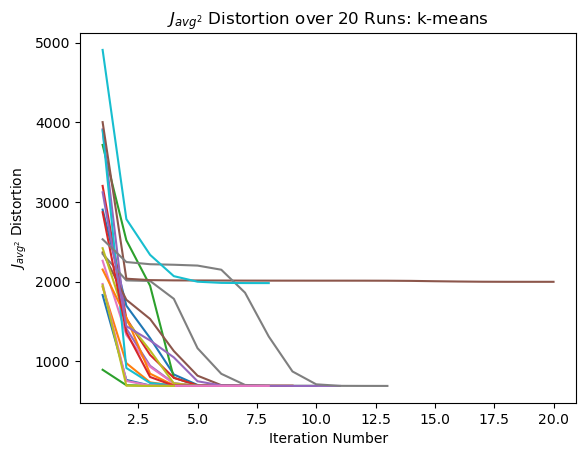

In [6]:
# STEP 4: Plot J values

fig, ax = plt.subplots()
ax.set_xlabel("Iteration Number")
ax.set_ylabel("$J_{avg^2}$ Distortion")
ax.set_title("$J_{avg^2}$ Distortion over 20 Runs: k-means")
for q in range(20):
    iters = np.linspace(1, T[q], T[q], dtype=int)
    plt.plot(iters, J[q])


## 2b: k-means++ algorithm

In [7]:
def D(p, xj, m):
    """
    Calculates D for kmeans++
    p is the max index of centroid which xj is being compared against
    xj is the vector being checked against the centroid
    m is the vector of centroids
    """
    minimum = np.Inf
    for i in range(p + 1):
        cur_norm = np.linalg.norm(xj - m[i])
        if cur_norm < minimum:
            minimum = cur_norm
    return minimum

In [8]:
#STEP 1: Initialize m[0] randomly, and use kmeans++ to find the others
m.clear()
a = random.sample(x, 1)[0]
m.append(a)

for i in range(2):
    P = []
    for j in range(N):
        num = D(i, x[j], m)**2
        denom = 0
        for l in range(N):
            denom = denom + D(i, x[l], m)**2
        P.append(num/denom)
    P_sum = [P[0]]
    for q in range(1, len(P)):
        P_sum.append(P_sum[q - 1] + P[q])
    m_index = np.random.choice(range(N), p=P)
    m.append(x[m_index])


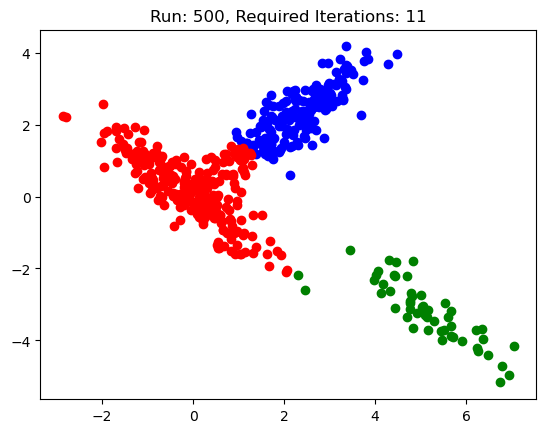

<Figure size 1000x1000 with 0 Axes>

In [9]:
#STEP 2: Run kmeans as before with our new centroids m
#This will be turned off after the first plot so that we don't see 20 plots
plotbool = True

Jpp = [] # J has length 20, and each element is a list of distortion values that have length determined by convergence
Tpp = [] # Similarly, T has length 20 and each element is an integer indicating the number of iterations required for convergence
for q in range(20):
    cur_J = []
    k = 3

    #kmeans++
    m.clear()
    a = random.sample(x, 1)[0]
    m.append(a)

    for i in range(2):
        P = []
        for j in range(N):
            num = D(i, x[j], m)**2
            denom = 0
            for l in range(N):
                denom = denom + D(i, x[l], m)**2
            P.append(num/denom)
        P_sum = [P[0]]
        for q in range(1, len(P)):
            P_sum.append(P_sum[q - 1] + P[q])
        m_index = np.random.choice(range(N), p=P)
        m.append(x[m_index])

    t = 1 #t will track how many iterations till convergence
    while True:
        #Generate gamma and C
        gamma = get_gamma(m, x)
        C = get_C(x, gamma)
        cur_J.append(get_J(x, m, C, k))

        #Update centroid locations/use a temp variable to check if our centroids will change,
        #if not, then we stop iterating
        temp = m[:]
        for i in range(k):
            sum_x = 0.0
            sum_y = 0.0
            for j in range(len(C[i])):
                sum_x = sum_x + C[i][j][0]
                sum_y = sum_y + C[i][j][1]
            m[i] = (sum_x/len(C[i]), sum_y/len(C[i]))

        
        diff = 0.0
        for i in range(k):
            diff = diff + np.linalg.norm(temp[i][0] - m[i][0]) + np.linalg.norm(temp[i][1] - m[i][1])
        if diff < 1e-6:
            #Plot corresponding points
            if plotbool:
                for i in range(k):
                    cur_points = C[i]
                    colors = ['b', 'g', 'r']
                    for j in range(len(cur_points)):
                        plt.scatter(cur_points[j][0], cur_points[j][1], color=colors[i])
                plt.title(f"Run: {q + 1}, Required Iterations: {t}")
                plt.figure(figsize=(10, 10))
                plt.show()
                plotbool = False
            break
        t = t + 1
    Tpp.append(t)
    Jpp.append(cur_J)
    



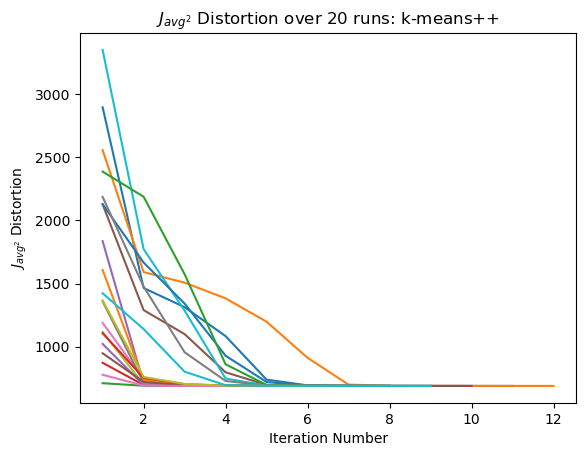

In [10]:
# STEP 3: Plot J values
fig, ax = plt.subplots()
ax.set_xlabel("Iteration Number")
ax.set_ylabel("$J_{avg^2}$ Distortion")
ax.set_title("$J_{avg^2}$ Distortion over 20 runs: k-means++")
for q in range(20):
    iters = np.linspace(1, Tpp[q], Tpp[q], dtype=int)
    plt.plot(iters, Jpp[q])

In [16]:
#Compare kmeans to kmeans++
flat_Jpp = []
flat_J = []

for i in range(len(Jpp)):
    for j in range(len(Jpp[i])):
        flat_Jpp.append(Jpp[i][j])

for i in range(len(J)):
    for j in range(len(J[i])):
        flat_J.append(J[i][j])

avg_J = np.average(flat_J)
std_J = np.std(flat_J)
med_J = np.median(flat_J)
avg_T = np.average(T)

avg_Jpp = np.average(flat_Jpp)
std_Jpp = np.std(flat_Jpp)
med_Jpp = np.median(flat_Jpp)
avg_Tpp = np.average(Tpp)

round_to = 2

print(f"Average distortion for k-means: {round(avg_J, round_to)}")
print(f"Standard deviation of distortion for k-means: {round(std_J, round_to)}")
print(f"Median distortion for k-means: {round(med_J, round_to)}")
print(f"Average required iterations for k-means: {avg_T}\n")

print(f"Average distortion for k-means++: {round(avg_Jpp, round_to)}")
print(f"Standard deviation of distortion for k-means++: {round(std_Jpp, round_to)}")
print(f"Median distortion for k-means++: {round(med_Jpp, round_to)}")
print(f"Average required iterations for k-means++: {avg_Tpp}")



Average distortion for k-means: 1288.84
Standard deviation of distortion for k-means: 817.72
Median distortion for k-means: 749.15
Average required iterations for k-means: 8.95

Average distortion for k-means++: 913.0
Standard deviation of distortion for k-means++: 464.07
Median distortion for k-means++: 692.52
Average required iterations for k-means++: 7.55
